In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [414]:
file = r"C:\Users\Matthew Samson\Downloads\omni_MDY_4-20-2024_HMS_5-34-22.CSV"
df = pd.read_csv(file)


In [415]:
print(df['Steering'].min())
print(df['Steering'].max())

1337
3394


In [416]:
# make copy of df and save to different csv
# df = df
df["elapsed_time"] = df["Time"]/1000
df['elapsed_time'] = df['elapsed_time'] - df["elapsed_time"][0]
print(df["elapsed_time"])
for col in list(df):
    if ('Accel' in col):
        df[col] = df[col]/1000
    if 'Gyro' in col:
        df[col] = df[col]/10
    if 'Yaw' in col or 'Pitch' in col or 'Roll' in col:
        df[col] = df[col]/100
    if 'Steering' in col:
        df['Steering'] = (df['Steering']- df['Steering'].min())/(df["Steering"].max() - df["Steering"].min())
    if ('Longitude' in col) or ('Latitude' in col):
        df[col] = df[col]/10000000
# df['Time']
# df.to_csv('joe_dataframe'+input('joe filename: ')+'.csv')
    

0         0.000
1         0.100
2         0.200
3         1.051
4         1.174
         ...   
1150    115.783
1151    115.883
1152    115.983
1153    116.083
1154    116.183
Name: elapsed_time, Length: 1155, dtype: float64


In [417]:
df['Time'] = pd.to_datetime(df['Time'], unit='ms')
df.set_index("Time",inplace=True)
print(df)

                         Accel_X  Accel_Y  Accel_Z  BrakePressureFront  \
Time                                                                     
2024-04-20 05:34:30.000    0.053   -0.017    1.013                   0   
2024-04-20 05:34:30.100    0.051   -0.018    1.015                   0   
2024-04-20 05:34:30.200    0.050   -0.026    1.016                   0   
2024-04-20 05:34:31.051    0.053   -0.024    1.014                   0   
2024-04-20 05:34:31.174    0.059   -0.015    1.011                   0   
...                          ...      ...      ...                 ...   
2024-04-20 05:36:25.783    0.031   -0.025    0.997                   0   
2024-04-20 05:36:25.883    0.027   -0.009    0.997                   0   
2024-04-20 05:36:25.983    0.016   -0.008    1.024                   0   
2024-04-20 05:36:26.083    0.027   -0.013    1.027                   0   
2024-04-20 05:36:26.183    0.060    0.000    1.008                   0   

                         BrakePressur

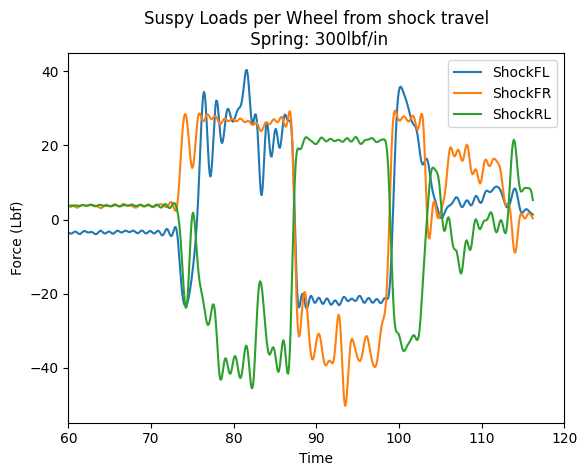

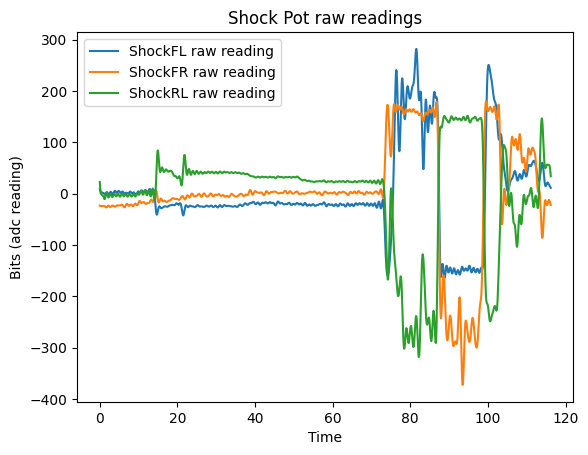

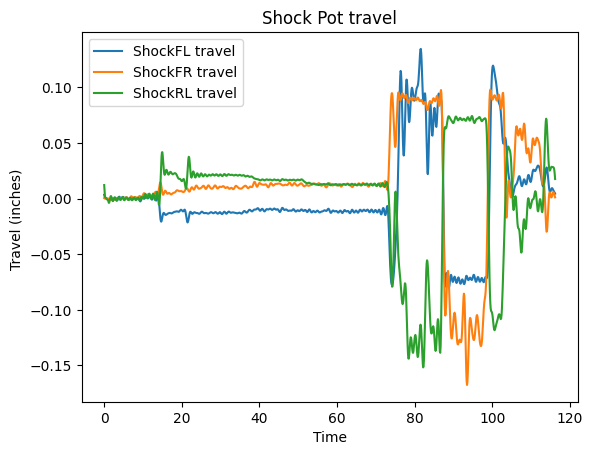

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'Accel_X': 0.0013464909742823676, 'Accel_Y': -0.04317728016097299, 'Accel_Z': 0.046747070878790195, 'BrakePressureFront': 0.0, 'BrakePressureRear': 0.0, 'Gyro_X': 29.609999999999996, 'Gyro_Y': -68.946, 'Gyro_Z': -13.196000000000002, 'Latitude': 27.809585812, 'Longitude': -69.304244736, 'Pitch': -0.17699999999999996, 'RPM': 0.0, 'Roll': -0.2739999999999999, 'ShockFL': 2.2257757714073563, 'ShockFR': -24.12963464782143, 'ShockRL': -2.610749611698891, 'ShockRR': 4095.0, 'Steering': 0.4358385999027711, 'TPS': 11.703999999999999, 'VSS1_FL': 0.0, 'VSS2_RL': 0.0, 'Yaw': -135.3362, 'elapsed_time': 3.1816800022125244, 'time_groups': 0.0}


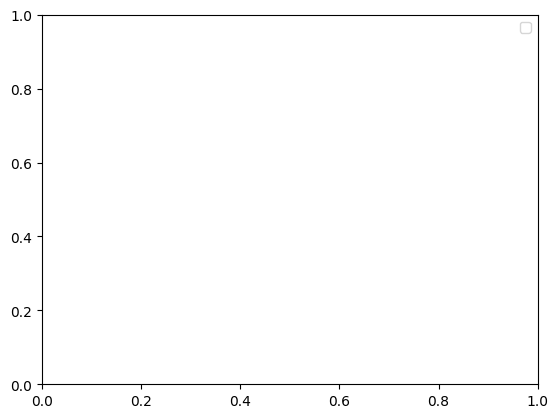

In [423]:
time = df['elapsed_time']
spring_constant_lb = 300 # lb per in
spring_constant = 112.9848333333 * spring_constant_lb
shockpot_travel = 50 # mm
shockpot_travel_in = shockpot_travel/25.4
adc_resolution = 12
travel_per_bit = shockpot_travel/(2**adc_resolution) 
travel_per_bit_inches = shockpot_travel_in/(2**adc_resolution)
dict_offsets = {}
xlim = ((60,120))
for col in df:
    dict_offsets[col] = df[col].iloc[:50].mean()
    
    if 'Shock' in col and 'RR' not in col:
        plt.plot(time,(df[col] - dict_offsets[col] )* travel_per_bit_inches * spring_constant_lb,label=col)        
plt.title(f"Suspy Loads per Wheel from shock travel\n Spring: {spring_constant_lb}lbf/in")
plt.ylabel('Force (Lbf)')
plt.xlabel('Time')
plt.xlim(xlim)
plt.legend()
plt.show()

for col in df:
    if 'Shock' in col and 'RR' not in col:
        plt.plot(time,df[col],label=f"{col} raw reading")
plt.title("Shock Pot raw readings")
plt.ylabel('Bits (adc reading)')
plt.xlabel('Time')
plt.legend()
plt.show()
for col in df:
    if 'Shock' in col and 'RR' not in col:
        plt.plot(time,(df[col] - dict_offsets[col] )* travel_per_bit_inches,label=f"{col} travel")
plt.title("Shock Pot travel")
plt.ylabel('Travel (inches) ')
plt.xlabel('Time')
plt.legend()
plt.show()
print(dict_offsets)
# plt.plot(time,df['ShockFL'],label='fl')
# plt.plot(time,df['ShockFR'],label='fr')
# plt.plot(time,df['ShockRL'],label='rl')

# plt.plot(time,df['ShockRR'],label='rr')
plt.legend()

In [419]:
# from scipy.signal import filtfilt, butter
# from pandas import DataFrame
# # Define the filter
# order = 4
# fs = 100  # Sampling frequency
# nyquist = fs / 2
# cutoff = min(0.5 * nyquist, 3)  # Desired cutoff frequency of the filter (Hz)
# print(str(cutoff)+"Hz")
# b, a = butter(order, cutoff / (fs / 2), btype='low')
# for col in list(df):
#     df["filt"+col] = filtfilt(b, a, df[col])
#     plt.plot(df['elapsed_time'],df[col],label="normal")
#     plt.plot(df['elapsed_time'],df["filt"+col],label="filt")
#     plt.legend()
#     plt.title(col)
#     plt.show()

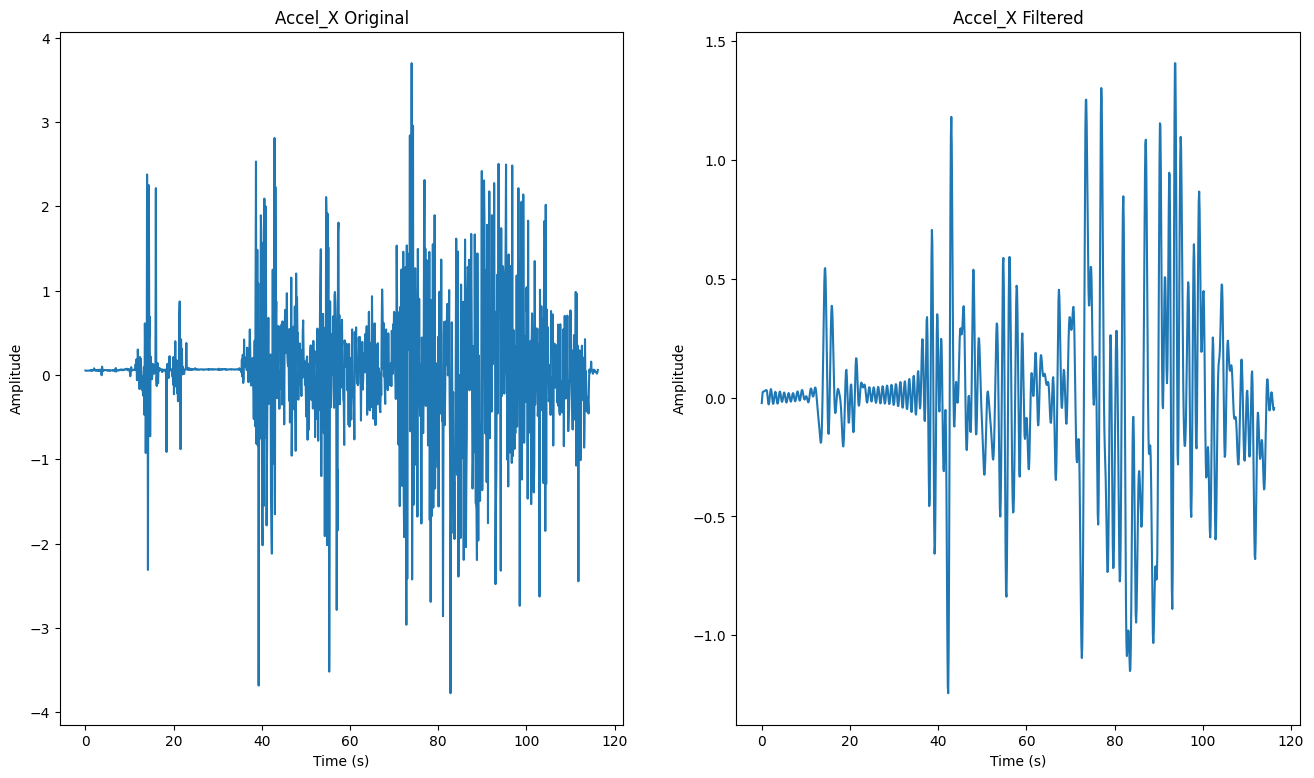

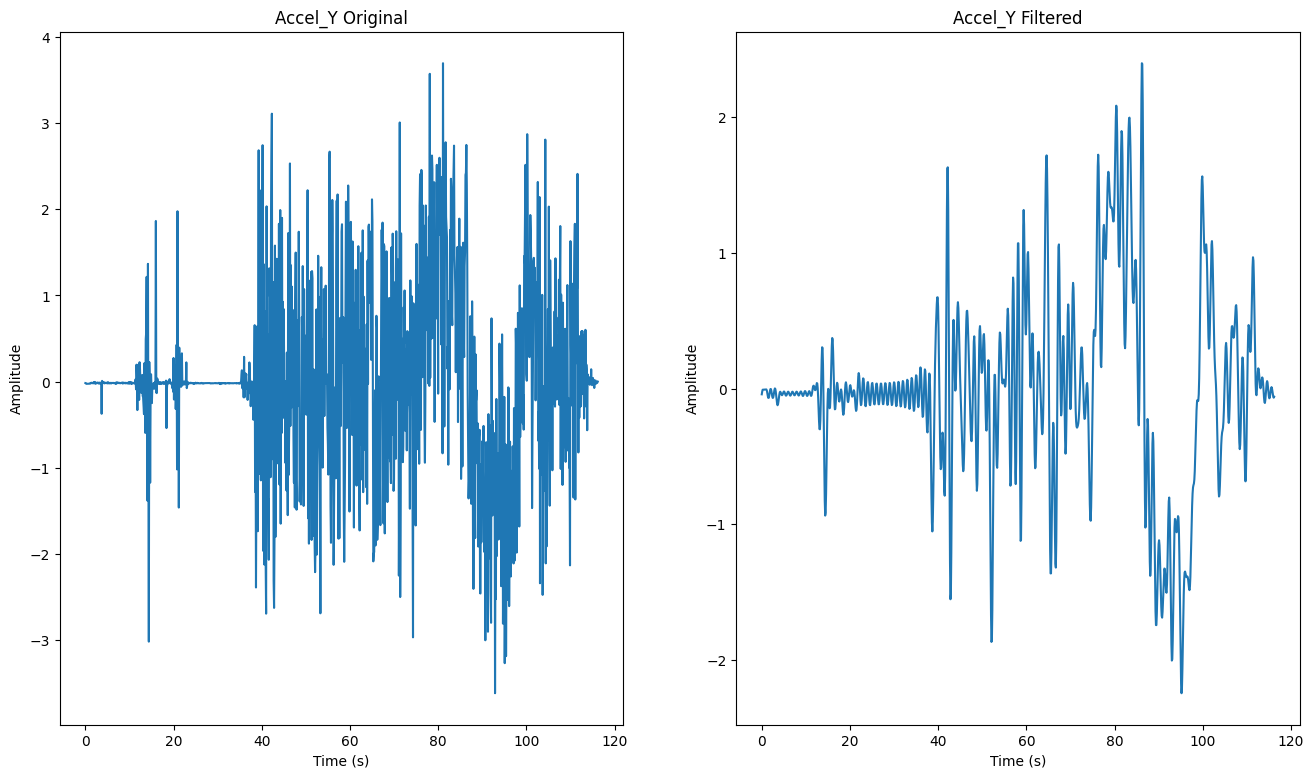

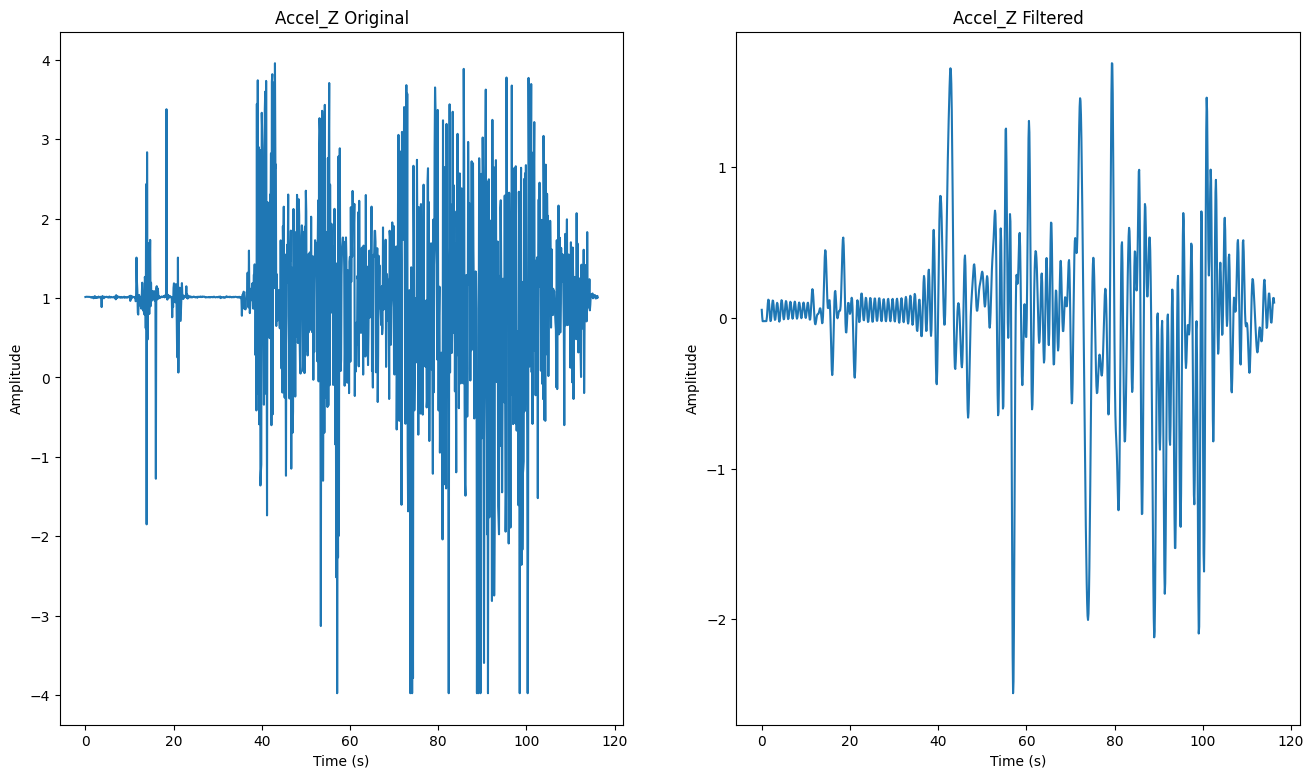

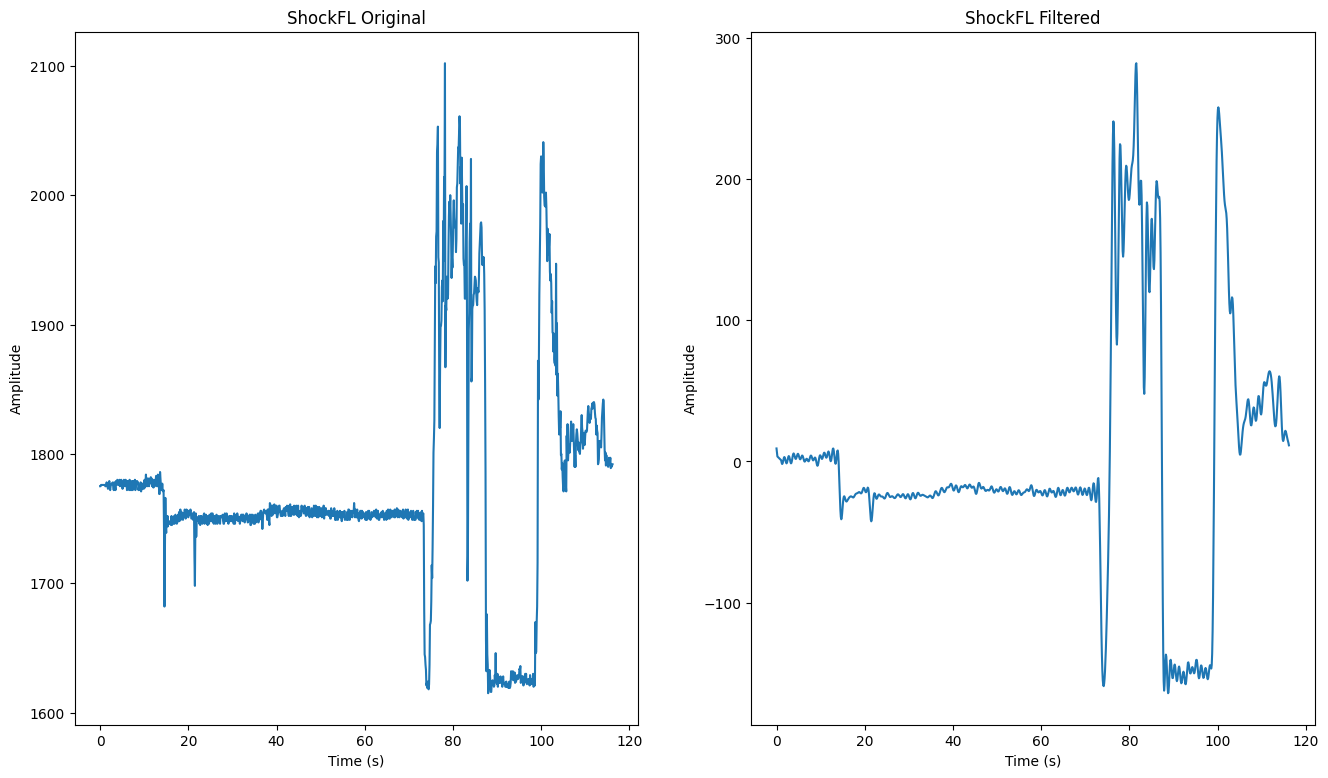

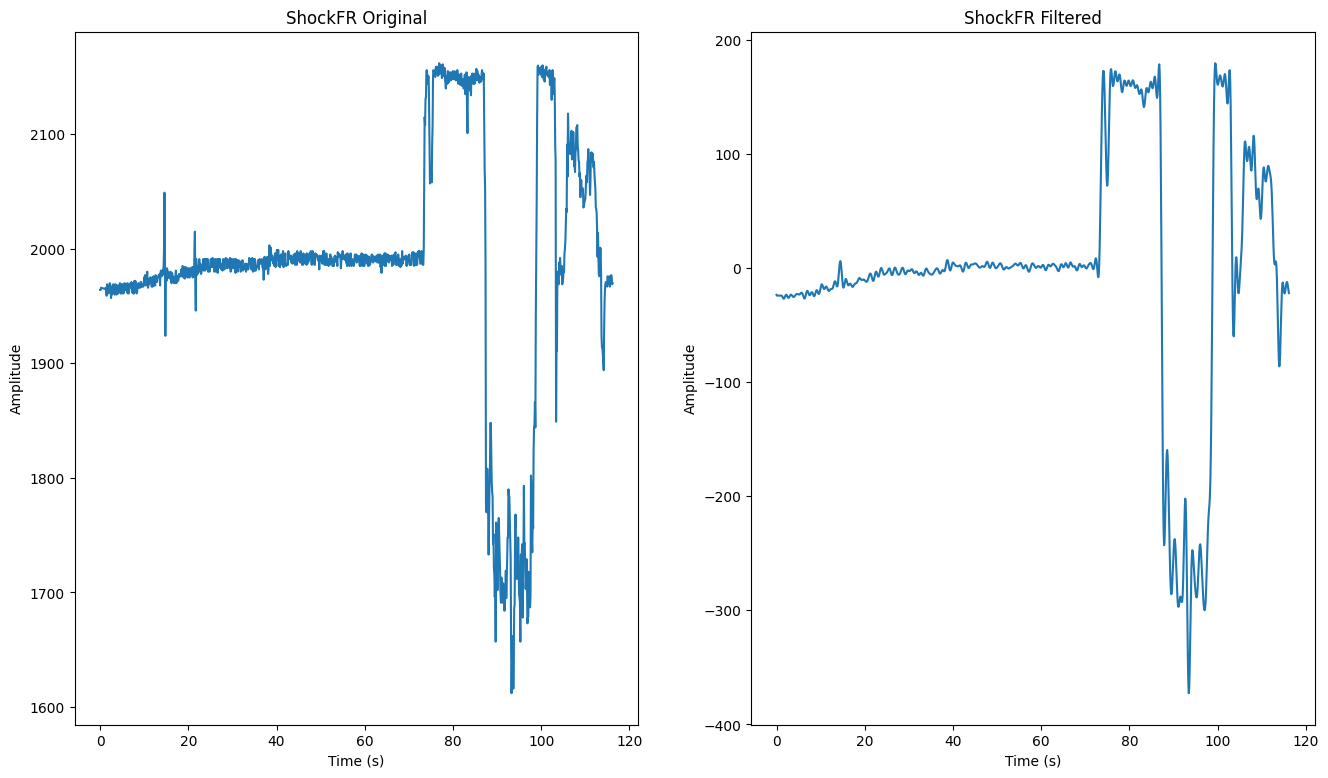

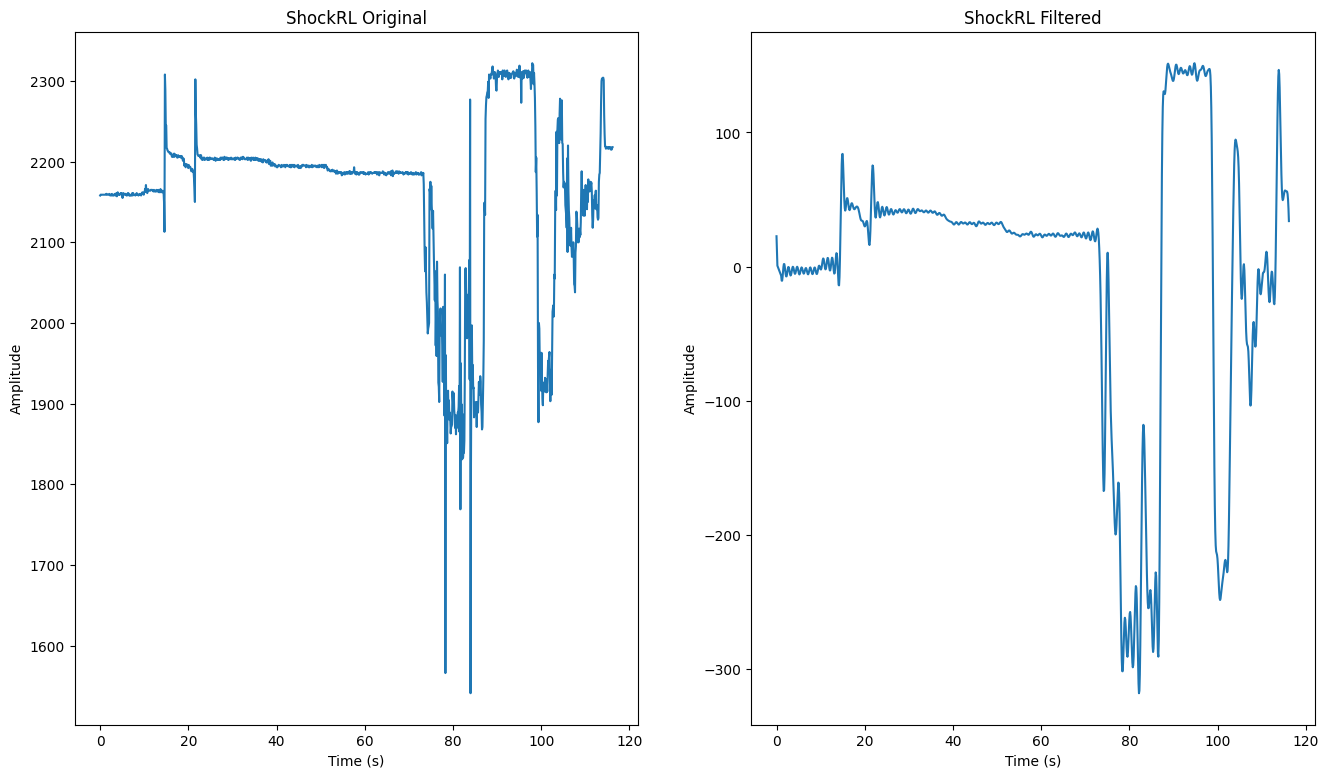

In [420]:
from scipy.fft import fft, ifft, fftfreq
import numpy as np
for col in ['Accel_X','Accel_Y','Accel_Z','ShockFL','ShockFR','ShockRL']:
    t = df["elapsed_time"]
    s = df[col]

    fft_result = np.fft.fft(s)
    fft_result[0] = 0  # Remove DC component

    # Apply a simple low-pass filter
    fft_freq = fftfreq(len(s), t[1] - t[0])
    fft_result[np.abs(fft_freq) > 1] = 0  # Discard frequencies above 5 Hz

    # Apply inverse Fourier transform
    filtered_signal = ifft(fft_result)

    # Update DataFrame with filtered signal
    df[col] = np.real(filtered_signal)

    # Plot filtered signal
    plt.figure(figsize=(16, 9))
    plt.subplot(1, 2, 1)
    plt.plot(t, s)
    plt.title(col + " Original")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(1, 2, 2)
    plt.plot(t, np.real(filtered_signal))
    plt.title(col + " Filtered")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.show()
# df.to_csv('joe_df_brendenSkidpad.csv')
# Now df contains the filtered signals for each column
# plt.plot(df['Accel_X'],df['Accel_Y'])

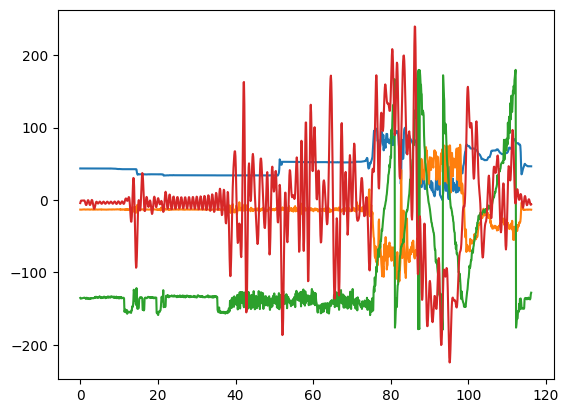

In [421]:
plt.plot(df['elapsed_time'],df['Steering']*100)
plt.plot(df['elapsed_time'],df['Gyro_Z'])
plt.plot(df['elapsed_time'],df['Yaw'])
plt.plot(df['elapsed_time'],df['Accel_Y']*100)

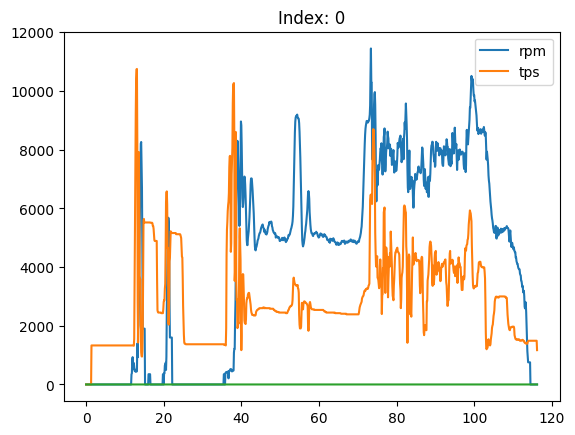

In [422]:
runs_dfs = []
df['time_groups'] = (
    df.index.to_series().diff().dt.seconds > 1).cumsum()

for ct, data in df.groupby('time_groups'):
    # if data['D1_Commanded_Torque'].max() < 200:
    #     continue
    # if data['D2_Motor_Speed'].min() > 500:
    #     continue
    data['AbsoluteTime'] = (data.index - data.index.min()).total_seconds()
    data.set_index('AbsoluteTime', inplace=True)

    runs_dfs.append(data)
for index,run_data in enumerate(runs_dfs):
    plt.plot(run_data.index,run_data['RPM'],label='rpm')
    plt.plot(run_data.index,run_data['TPS']*100,label='tps')
    plt.plot(run_data.index,run_data['Steering'])
    # plt.scatter(run_data.index,run_data['D1_Commanded_Torque'],marker='.',label='torque')
    plt.title(f"Index: {index}")
    plt.legend()
    plt.show()